In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

In [25]:
mall_data = pd.read_csv('data/Mall_Customers.csv')

In [26]:
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Train model

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++').fit(X)
kmeans_clustered = X.copy()
kmeans_clustered.loc[:, 'Cluster'] = kmeans.labels_

C:\dev\PIIS\lab2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualize

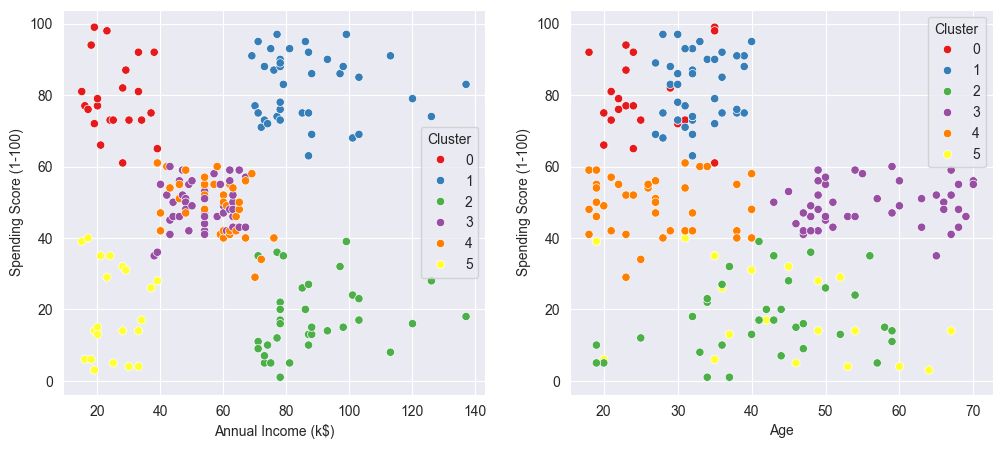

In [28]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(kmeans_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(kmeans_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

# Affinity Propagation

In [29]:
from sklearn.cluster import AffinityPropagation
AF = AffinityPropagation(preference=-11800).fit(X)
AF_clustered = X.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

# Visualize

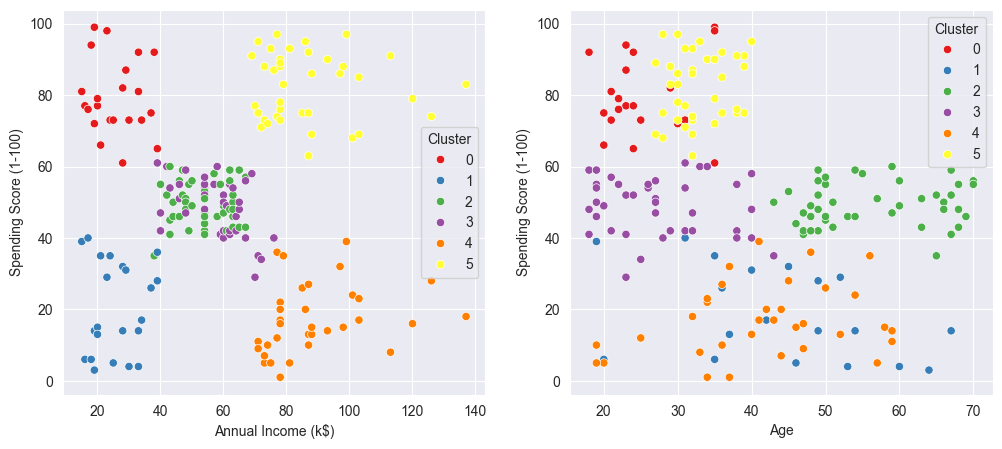

In [30]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot(AF_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
sns.scatterplot(AF_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')
plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

# Compare results

In [31]:
# Use dbscan labels as ground truth

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=12.5, min_samples=4).fit(X)

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score, normalized_mutual_info_score

for (name, pred) in [('KMEANS', kmeans.labels_), ('Affinity Propagation', AF.labels_)]:
    print(f'Silhouette {name}: {silhouette_score(X, pred)}')
    print(f'ARI {name}: {adjusted_rand_score(dbscan.labels_, pred)}')
    print(f'NMI {name}: {normalized_mutual_info_score(dbscan.labels_, pred)}')

Silhouette KMEANS: 0.4523443947724053
ARI KMEANS: 0.3651876127340171
NMI KMEANS: 0.5792304844451788
Silhouette Affinity Propagation: 0.4516490888773576
ARI Affinity Propagation: 0.367842274887852
NMI Affinity Propagation: 0.5863552685455267
